### Intro to Scikit-Learn

Scikilt-Learn (A.K.A Sklearn) is a widely used maching learning library in Python scientific computation.


Scikit-Learn API is designed with the following guiding principles:

###### Consistency -- All objects share a common interface drawn from a limited set of methods, with consistent documentation.

###### Inspection -- All specified parameter values are exposed as public attributes.

###### Limited object hierarchy -- Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

###### Composition -- Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

###### Sensible defaults -- When models require user-specified parameters, the library defines an appropriate default value.

#### Basic elements in Sklearn :

**Esitimator**
Any object that can estimate some parameters based on a dataset is called an estimator. The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter.

**Transformers**
Some estimators can also transform a dataset. These are called transformers. The transformation is perfromed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. Transformation generally relied on the learned parameters. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform().

**Predictors**
Some estimators are capable of making predictions given a dataset. They are called predictors. E.g. LinearRegression model. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. it also has a score() method that measures the quality of the predictions given a test set.


In [1]:
## Import packages: We usually use 
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris.data)

numpy.ndarray

In [8]:
dfIris = pd.DataFrame(iris.data, columns=iris.feature_names)
dfIris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


But in this sklearn dataset, target (for supervised learning) and raw data are separate.

In [12]:
target_mapping = dict(zip(pd.Series(iris.target).unique(), iris.target_names))

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
dfIris['Species'] = iris.target
dfIris['species_name'] = dfIris['Species'].apply(lambda k : target_mapping.get(k,None))
dfIris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [14]:
data_iris = dfIris.drop(['Species','species_name'], axis=1) 
data_iris.shape

(150, 4)

In [15]:
target_iris = dfIris['species_name'] 
target_iris.shape

(150,)

#### Supervised learning -- Simple Linear regression

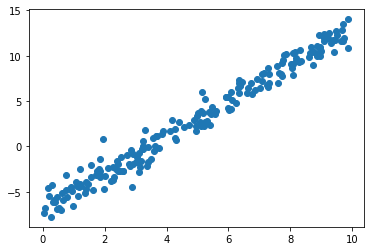

In [17]:
rs = np.random.RandomState(42)

x = 10 * rs.rand(200)
y = 2*x - 7 + rs.randn(200)
plt.scatter(x,y)

In [18]:
## Choose a class of model
from sklearn.linear_model import LinearRegression

In [19]:
## Init model class & choose model hyperparameters
### Every class of model is represented by a Python class
model_LR = LinearRegression(fit_intercept=True)
model_LR
## when model is instantiated, the only action is the storing of these hyperparameter values.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X = x.reshape((len(x), -1))
X.shape

(200, 1)

In [21]:
## Fit the model to your data
model_LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
## beta:
model_LR.coef_

array([1.99219289])

In [23]:
## alpha:
model_LR.intercept_

-6.894798849039176

In [24]:
## Predict labels for unknown data
xfit = np.linspace(-1, 11)

Xfit = xfit.reshape((len(xfit),-1))
yfit = model_LR.predict(Xfit)

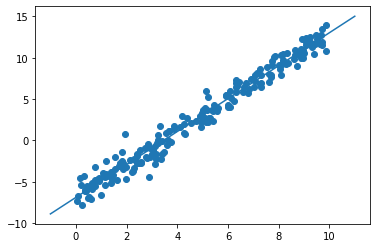

In [25]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

### Supervised learning example: Iris classification

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data_train, data_test, target_train, target_test = \
train_test_split(data_iris, target_iris, random_state=42)

In [28]:
from sklearn.naive_bayes import GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(data_train, target_train)

target_predict_by_model = model_GaussianNB.predict(data_test)
target_predict_by_model

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_predict_by_model)

1.0

### Unsupervised learning: Iris dimensionality

In [30]:
from sklearn.decomposition import PCA
model_PCA = PCA(n_components=2)
data_2D = model_PCA.fit_transform(data_iris)

In [31]:
dfIris['PCA1'] = data_2D[:, 0]
dfIris['PCA2'] = data_2D[:, 1]

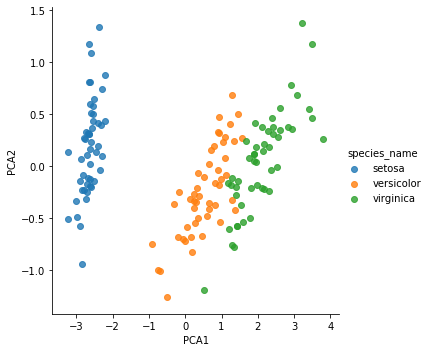

In [32]:
sns.lmplot("PCA1", "PCA2", hue = 'species_name', data=dfIris.drop(['Species'],axis=1), fit_reg = False)